# Pakistan Used Car Prices 2023

## 1. Understanding the Problem

The data was provided by PakWheels, the most renowned second-hand Car Selling company in Pakistan, and it contains selling history from 1990 to 2022 providing information about car features and its final price.

Research questions:

* Which car features have the most influence on the final price?

Link: https://www.kaggle.com/datasets/talhabarkaatahmad/pakistan-used-car-prices-2023

## 2. Data Understanding

Characteristics:

* **Type**: Structured.
* **Format**: CSV file.
* **Size**: 8 MB.
* **Collection**: observational, so causation conclusions are not possible.
* **Sampling method**: not specified.

## 3. Data exploration

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from collections import Counter

In [3]:
plt.style.use("ggplot")

### 3.1. Review the state of the data

This is a first glance over the data.

In [4]:
PATH_DATA = os.path.join(os.getenv("PATH_DATA_PROJECTS"), "Tabular", "Pakistan_Used_Car_Prices_2023")

In [54]:
df = pd.read_csv(os.path.join(PATH_DATA, "pakwheels_used_car_data.csv"))
print("Shape:", df.shape)
df.head()

Shape: (77878, 14)


,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


In [7]:
print("Total missing by columns:")
df.isnull().sum()

Total missing by columns:


addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

#### 3.1.1. Categorical

In [8]:
categorical_features = ["city", "assembly", "body", "make", "model", "transmission", "fuel", "color", "registered"]

Review unique values

In [9]:
for c in categorical_features:
    print("\nFeature:", c, "- unique values:", len(df[c].unique()))
    print(df[c].unique())


Feature: city - unique values: 297
['Peshawar' 'Lahore' 'Vehari' 'Islamabad' 'Faisalabad' 'Sialkot'
 'Mansehra' 'Gujranwala' 'Kasur' 'Bahawalnagar' 'Karachi' 'Rawalpindi'
 'Quetta' 'Mardan' 'Pindi' 'Gujrat' 'Charsadda' 'Hyderabad' 'Multan'
 'Chichawatni' 'Kohat' 'Chakwal' 'Abbottabad' 'Hafizabad' 'Nowshera'
 'Okara' 'Sadiqabad' 'Wah' 'Haripur' 'D.G.Khan' 'Sargodha' 'Dadyal'
 'Jaranwala' 'Kharian' 'Haroonabad' 'Depal' 'Sahiwal' 'Swabi' 'Muzaffar'
 'Jhang' 'Bahawalpur' 'Daharki' 'Jalalpur' 'Rahim' 'Wazirabad' 'Dina'
 'Chashma' 'Gojra' 'Jhelum' 'Chishtian' 'Mandi' 'Kotli' 'Arifwala'
 'Mingora' 'Mirpur' 'Khushab' 'Lakki' 'Gujar' 'Mian' 'Hasilpur'
 'Hayatabad' 'Attock' 'Taxila' 'Ranipur' 'Dera' 'Bhalwal' 'Shorkot'
 'Renala' 'Abdul' 'Toba' 'Rajana' 'Bhakkar' 'Tando' 'Nawabshah' 'Phalia'
 'Khairpur' 'Dargai' 'Bhera' 'Sheikhupura' 'Head' 'Sambrial'
 'Muzaffarabad' 'Talagang' 'Layyah' 'Swatmingora' 'Burewala' 'Mamu'
 'Sukkur' 'Shakargarh' 'More' 'Pattoki' 'Sohawa' 'Zafarwal' 'Satiana'
 'Fort' 

City

In [71]:
counter = Counter(df["city"].values)
dfCounter =  pd.DataFrame(counter.items(), columns = ["City", "Frequency"])
print("Shape:", dfCounter.shape)
dfCounter.head(10)

Shape: (297, 2)


,City,Frequency
0,Peshawar,3689
1,Lahore,16674
2,Vehari,156
3,Islamabad,11501
4,Faisalabad,3037
5,Sialkot,1328
6,Mansehra,261
7,Gujranwala,1999
8,Kasur,116
9,Bahawalnagar,96


In [79]:
most_common_v, most_common_f = dfCounter.loc[dfCounter["Frequency"].idxmax(), "City"], dfCounter.loc[dfCounter["Frequency"].idxmax(), "Frequency"]
least_common_v, least_common_f = dfCounter.loc[dfCounter["Frequency"].idxmin(), "City"], dfCounter.loc[dfCounter["Frequency"].idxmin(), "Frequency"]
most_count = dfCounter[dfCounter["Frequency"] == most_common_f].shape[0]
least_count = dfCounter[dfCounter["Frequency"] == least_common_f].shape[0]

print(f"Most common value: {most_common_v} and its frequency: {most_common_f}")
print(f"Least common value: {least_common_v} and its frequency: {least_common_f}")
print(f"Frequency for most common value '{most_common_f}': {most_count}")
print(f"Frequency for least common value '{least_common_f}': {least_count}")

Most common value: Lahore and its frequency: 16674
Least common value: More and its frequency: 1
Frequency for most common value '16674': 1
Frequency for least common value '1': 35


assembly

In [82]:
counter = Counter(df["assembly"].values)
dfCounter =  pd.DataFrame(counter.items(), columns = ["assembly", "Frequency"])
print("Shape:", dfCounter.shape)
dfCounter.head(10)

Shape: (2, 2)


,assembly,Frequency
0,NaN,53689
1,Imported,24189


body

In [83]:
counter = Counter(df["body"].values)
dfCounter =  pd.DataFrame(counter.items(), columns = ["body", "Frequency"])
print("Shape:", dfCounter.shape)
dfCounter

Shape: (22, 2)


,body,Frequency
0,Sedan,30193
1,Hatchback,25014
2,SUV,5087
3,MPV,786
4,NaN,8904
5,Crossover,2156
6,Micro Van,539
7,Mini Van,1337
8,Double Cabin,779
9,Compact sedan,793


In [84]:
most_common_v, most_common_f = dfCounter.loc[dfCounter["Frequency"].idxmax(), "body"], dfCounter.loc[dfCounter["Frequency"].idxmax(), "Frequency"]
least_common_v, least_common_f = dfCounter.loc[dfCounter["Frequency"].idxmin(), "body"], dfCounter.loc[dfCounter["Frequency"].idxmin(), "Frequency"]
most_count = dfCounter[dfCounter["Frequency"] == most_common_f].shape[0]
least_count = dfCounter[dfCounter["Frequency"] == least_common_f].shape[0]

print(f"Most common value: {most_common_v} and its frequency: {most_common_f}")
print(f"Least common value: {least_common_v} and its frequency: {least_common_f}")
print(f"Frequency for most common value '{most_common_f}': {most_count}")
print(f"Frequency for least common value '{least_common_f}': {least_count}")

Most common value: Sedan and its frequency: 30193
Least common value: Compact hatchback and its frequency: 4
Frequency for most common value '30193': 1
Frequency for least common value '4': 1


make

In [85]:
counter = Counter(df["make"].values)
dfCounter =  pd.DataFrame(counter.items(), columns = ["make", "Frequency"])
print("Shape:", dfCounter.shape)
dfCounter

Shape: (68, 2)


,make,Frequency
0,Toyota,24910
1,Honda,16428
2,Suzuki,22347
3,Daihatsu,3181
4,Mitsubishi,1101
...,...,...
63,Hummer,4
64,JMC,4
65,Roma,1
66,Classic,1


In [86]:
most_common_v, most_common_f = dfCounter.loc[dfCounter["Frequency"].idxmax(), "make"], dfCounter.loc[dfCounter["Frequency"].idxmax(), "Frequency"]
least_common_v, least_common_f = dfCounter.loc[dfCounter["Frequency"].idxmin(), "make"], dfCounter.loc[dfCounter["Frequency"].idxmin(), "Frequency"]
most_count = dfCounter[dfCounter["Frequency"] == most_common_f].shape[0]
least_count = dfCounter[dfCounter["Frequency"] == least_common_f].shape[0]

print(f"Most common value: {most_common_v} and its frequency: {most_common_f}")
print(f"Least common value: {least_common_v} and its frequency: {least_common_f}")
print(f"Frequency for most common value '{most_common_f}': {most_count}")
print(f"Frequency for least common value '{least_common_f}': {least_count}")

Most common value: Toyota and its frequency: 24910
Least common value: GAC and its frequency: 1
Frequency for most common value '24910': 1
Frequency for least common value '1': 7


model

In [87]:
counter = Counter(df["model"].values)
dfCounter =  pd.DataFrame(counter.items(), columns = ["model", "Frequency"])
print("Shape:", dfCounter.shape)
dfCounter

Shape: (435, 2)


,model,Frequency
0,Corolla,12871
1,City,5277
2,Yaris,1291
3,Swift,1534
4,Civic,8275
...,...,...
430,Jiaxing,1
431,1,1
432,1300,1
433,New,1


In [88]:
most_common_v, most_common_f = dfCounter.loc[dfCounter["Frequency"].idxmax(), "model"], dfCounter.loc[dfCounter["Frequency"].idxmax(), "Frequency"]
least_common_v, least_common_f = dfCounter.loc[dfCounter["Frequency"].idxmin(), "model"], dfCounter.loc[dfCounter["Frequency"].idxmin(), "Frequency"]
most_count = dfCounter[dfCounter["Frequency"] == most_common_f].shape[0]
least_count = dfCounter[dfCounter["Frequency"] == least_common_f].shape[0]

print(f"Most common value: {most_common_v} and its frequency: {most_common_f}")
print(f"Least common value: {least_common_v} and its frequency: {least_common_f}")
print(f"Frequency for most common value '{most_common_f}': {most_count}")
print(f"Frequency for least common value '{least_common_f}': {least_count}")

Most common value: Corolla and its frequency: 12871
Least common value: 6 and its frequency: 1
Frequency for most common value '12871': 1
Frequency for least common value '1': 81


transmission

In [89]:
counter = Counter(df["transmission"].values)
dfCounter =  pd.DataFrame(counter.items(), columns = ["transmission", "Frequency"])
print("Shape:", dfCounter.shape)
dfCounter

Shape: (2, 2)


,transmission,Frequency
0,Manual,35115
1,Automatic,42763


fuel

In [91]:
counter = Counter(df["fuel"].values)
dfCounter =  pd.DataFrame(counter.items(), columns = ["fuel", "Frequency"])
print("Shape:", dfCounter.shape)
dfCounter

Shape: (4, 2)


,fuel,Frequency
0,Petrol,70620
1,Hybrid,2895
2,Diesel,3457
3,NaN,906


color

In [92]:
counter = Counter(df["color"].values)
dfCounter =  pd.DataFrame(counter.items(), columns = ["color", "Frequency"])
print("Shape:", dfCounter.shape)
dfCounter

Shape: (397, 2)


,color,Frequency
0,Silver Metallic,1204
1,Blue,2650
2,Super White,2414
3,Grey,4173
4,Albastar Silver,11
...,...,...
392,Cosmos Black,1
393,Ablaze Red Pearl,1
394,Cobalt Blue Metallic,1
395,Timeless Back,1


In [93]:
most_common_v, most_common_f = dfCounter.loc[dfCounter["Frequency"].idxmax(), "color"], dfCounter.loc[dfCounter["Frequency"].idxmax(), "Frequency"]
least_common_v, least_common_f = dfCounter.loc[dfCounter["Frequency"].idxmin(), "color"], dfCounter.loc[dfCounter["Frequency"].idxmin(), "Frequency"]
most_count = dfCounter[dfCounter["Frequency"] == most_common_f].shape[0]
least_count = dfCounter[dfCounter["Frequency"] == least_common_f].shape[0]

print(f"Most common value: {most_common_v} and its frequency: {most_common_f}")
print(f"Least common value: {least_common_v} and its frequency: {least_common_f}")
print(f"Frequency for most common value '{most_common_f}': {most_count}")
print(f"Frequency for least common value '{least_common_f}': {least_count}")

Most common value: White and its frequency: 21444
Least common value: Buckiham Blue and its frequency: 1
Frequency for most common value '21444': 1
Frequency for least common value '1': 101


registered

In [94]:
counter = Counter(df["registered"].values)
dfCounter =  pd.DataFrame(counter.items(), columns = ["registered", "Frequency"])
print("Shape:", dfCounter.shape)
dfCounter

Shape: (121, 2)


,registered,Frequency
0,Lahore,18739
1,Punjab,9414
2,Islamabad,18942
3,Un-Registered,5058
4,Sindh,9906
...,...,...
116,Ahmed Pur East,1
117,Hattar,1
118,Arifwala,1
119,Akora khattak,1


In [95]:
most_common_v, most_common_f = dfCounter.loc[dfCounter["Frequency"].idxmax(), "registered"], dfCounter.loc[dfCounter["Frequency"].idxmax(), "Frequency"]
least_common_v, least_common_f = dfCounter.loc[dfCounter["Frequency"].idxmin(), "registered"], dfCounter.loc[dfCounter["Frequency"].idxmin(), "Frequency"]
most_count = dfCounter[dfCounter["Frequency"] == most_common_f].shape[0]
least_count = dfCounter[dfCounter["Frequency"] == least_common_f].shape[0]

print(f"Most common value: {most_common_v} and its frequency: {most_common_f}")
print(f"Least common value: {least_common_v} and its frequency: {least_common_f}")
print(f"Frequency for most common value '{most_common_f}': {most_count}")
print(f"Frequency for least common value '{least_common_f}': {least_count}")

Most common value: Islamabad and its frequency: 18942
Least common value: Mingora and its frequency: 1
Frequency for most common value '18942': 1
Frequency for least common value '1': 42


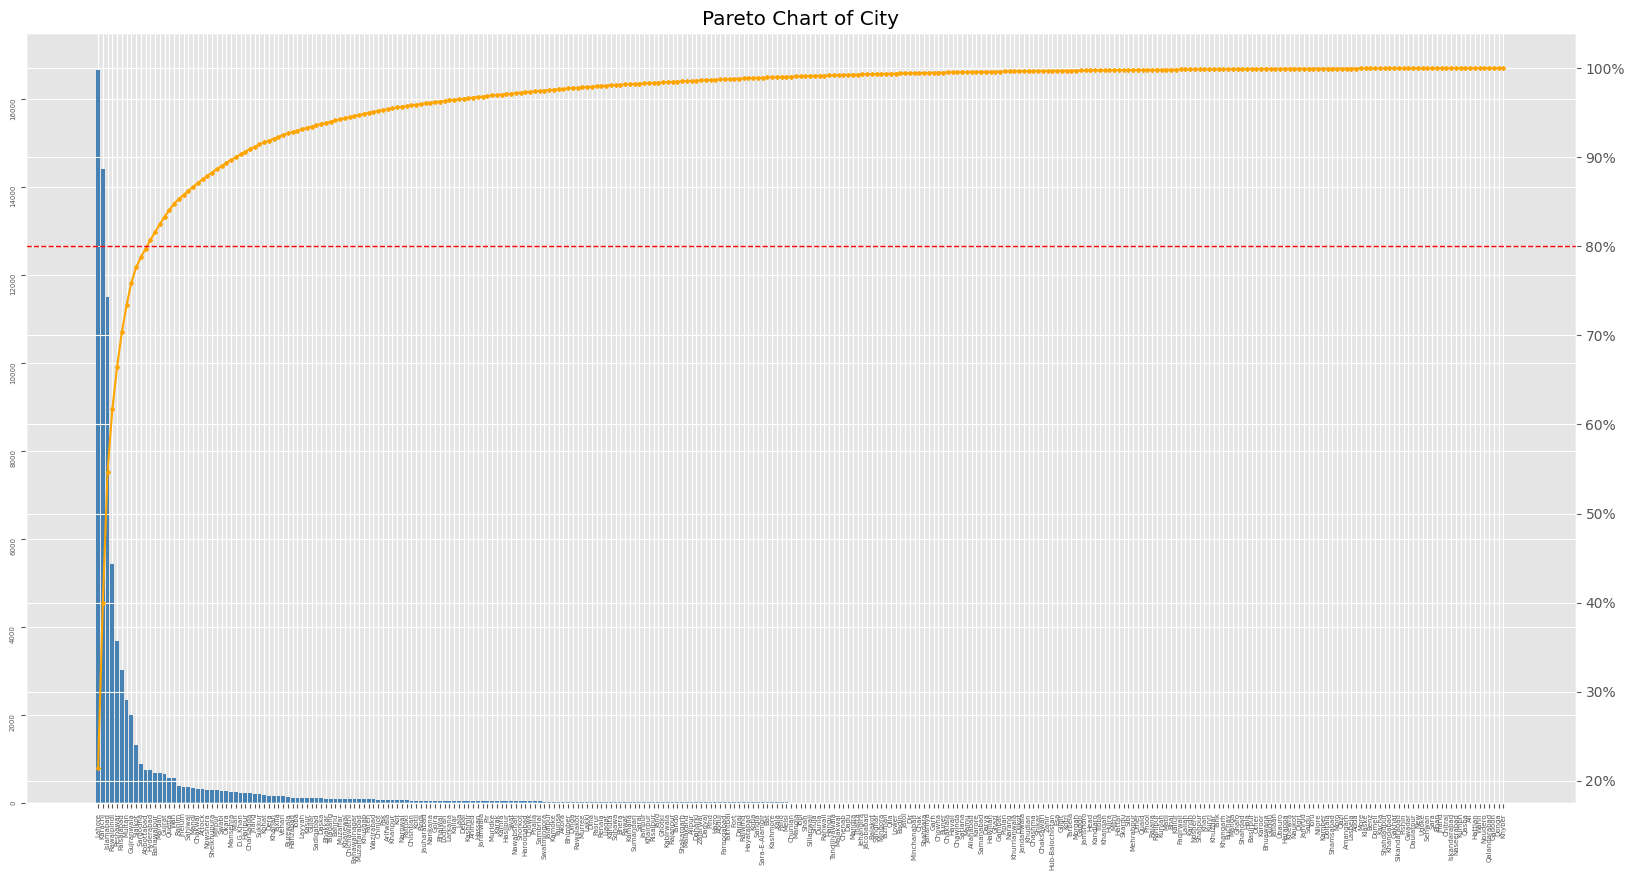

In [56]:
# Calculate frequencies
city_count = df["city"].value_counts()

# Create basic bar plot
fig, axs = plt.subplots(figsize = (20, 10))
axs.bar(city_count.index, city_count, color = "steelblue")
axs.tick_params(rotation = 90, labelsize = 5)

# Add cumulative percentage line to plot
ax2 = axs.twinx()
ax2.plot(city_count.index, city_count.cumsum()/city_count.sum()*100, marker = "D", ms = 2, color = "orange")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(y = 80, color = "red", linestyle = "--", linewidth = 1)  # 80% line

plt.title("Pareto Chart of City")
plt.show()

In [62]:
city_count = df["city"].value_counts()
cummutaly_relative_frequency = city_count.cumsum()/city_count.sum()*100
cummutaly_relative_frequency[cummutaly_relative_frequency <= 80]

city
Lahore        21.410411
Karachi       39.939392
Islamabad     54.707363
Rawalpindi    61.702920
Peshawar      66.439816
Faisalabad    70.339505
Multan        73.353193
Gujranwala    75.920029
Sialkot       77.625260
Sargodha      78.753948
Abbottabad    79.736254
Name: count, dtype: float64

Body

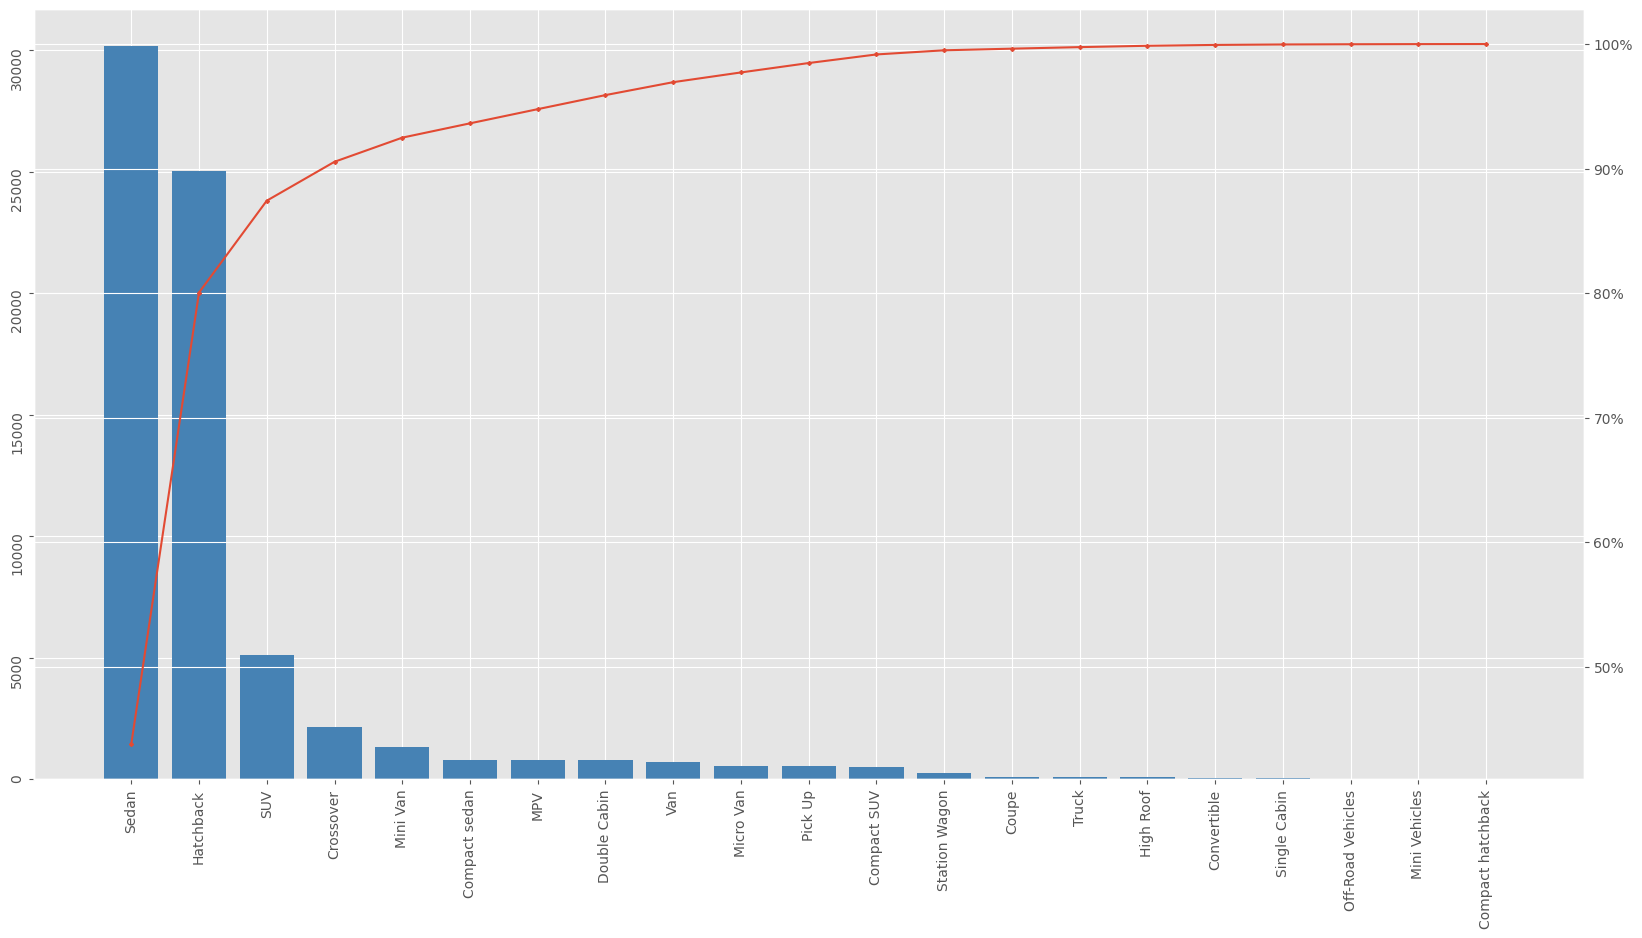

In [66]:
# Calculate frequencies
body_count = df["body"].value_counts()

# Create basic bar plot
fig, axs = plt.subplots(figsize = (20, 10))
axs.bar(body_count.index, body_count, color = "steelblue")
axs.tick_params(rotation = 90)

# Add cumulative percentage line to plot
ax2 = axs.twinx()
ax2.plot(body_count.index, body_count.cumsum()/body_count.sum()*100, marker = "D", ms = 2)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.show()

In [19]:
make_count = df["make"].value_counts()
make_freq = (make_count / df.shape[0]) * 100
make_freq

make
Toyota      31.985927
Suzuki      28.694882
Honda       21.094532
Daihatsu     4.084594
KIA          2.265081
              ...    
Buick        0.001284
Mushtaq      0.001284
Roma         0.001284
Classic      0.001284
Rinco        0.001284
Name: count, Length: 68, dtype: float64

In [20]:
model_count = df["model"].value_counts()
model_freq = (model_count / df.shape[0]) * 100
model_freq

model
Corolla    16.527132
Civic      10.625594
City        6.775983
Mehran      5.891266
Cultus      5.730758
             ...    
Amarok      0.001284
XL7         0.001284
1300        0.001284
New         0.001284
Sc          0.001284
Name: count, Length: 435, dtype: float64

In [21]:
color_count = df["color"].value_counts()
color_freq = (color_count / df.shape[0]) * 100
color_freq

color
White                   27.535376
Silver                  10.494620
Black                    9.006395
Grey                     5.358381
Solid White              5.229975
                          ...    
Cosmos Black             0.001284
Ablaze Red Pearl         0.001284
Cobalt Blue Metallic     0.001284
Timeless Back            0.001284
Brilliant Red            0.001284
Name: count, Length: 396, dtype: float64

In [22]:
registered_count = df["registered"].value_counts()
registered_freq = (registered_count / df.shape[0]) * 100
registered_freq

registered
Islamabad         24.322659
Lahore            24.061994
Karachi           13.916639
Sindh             12.719895
Punjab            12.088138
                    ...    
Ahmed Pur East     0.001284
Hattar             0.001284
Arifwala           0.001284
Akora khattak      0.001284
Hunza              0.001284
Name: count, Length: 121, dtype: float64

#### 3.1.2. Numeric

In [15]:
numeric_features = ["year", "engine", "mileage"]
df[numeric_features].describe()

,year,engine,mileage
count,73099.000000,77875.000000,77878.000000
mean,2012.812610,1408.072550,91109.192750
std,7.516685,704.459947,89275.336173
min,1990.000000,3.000000,1.000000
25%,2007.000000,1000.000000,34000.000000
50%,2015.000000,1300.000000,80000.000000
75%,2019.000000,1600.000000,123456.000000
max,2022.000000,15000.000000,1000000.000000


#### Target variable

In [16]:
target_variable = "price"
df[target_variable].describe()

count    7.729500e+04
mean     3.883232e+06
std      5.759480e+06
min      1.100000e+05
25%      1.450000e+06
50%      2.700000e+06
75%      4.500000e+06
max      5.290000e+08
Name: price, dtype: float64

### Data cleaning

#### Categorical

In [17]:
df["city"] = df["city"].map(lambda x: x.strip() if isinstance(x, str) else x)
df["body"] = df["body"].map(lambda x: x.strip() if isinstance(x, str) else x)
df["make"] = df["make"].map(lambda x: x.strip() if isinstance(x, str) else x)
df["model"] = df["model"].map(lambda x: x.strip() if isinstance(x, str) else x)
df["color"] = df["color"].map(lambda x: x.strip() if isinstance(x, str) else x)
df["registered"] = df["registered"].map(lambda x: x.strip() if isinstance(x, str) else x)

In [18]:
df["city"] = df["city"].map(lambda x: x if x in ("Lahore", "Karachi", "Islamabad") else "Other")
df["body"] = df["body"].map(lambda x: x if x in ("Sedan", "Hatchback") else "Other")
df["make"] = df["make"].map(lambda x: x if x in ("Toyota", "Suzuki", "Honda") else "Other")
df["model"] = df["model"].map(lambda x: x if x in ("Corolla", "Civic") else "Other")
df["color"] = df["color"].map(lambda x: x if x in ("White", "Silver") else "Other")
df["registered"] = df["registered"].map(lambda x: x if x in ("Islamabad", "Lahore", "Karachi", "Sindh", "Punjab", "Un-Registered") else "Other")

In [19]:
df["assembly"] = df["assembly"].fillna("Local")
df["fuel"] = df["fuel"].fillna("Other")

#### Numeric

In [20]:
df = df.dropna()

In [21]:
df.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Other,Local,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Other,Lahore,145000,2870000.0
1,7730314,Lahore,Local,Sedan,Honda,Other,2000.0,1300.0,Manual,Petrol,Other,Lahore,230000,995000.0
2,7943737,Lahore,Local,Sedan,Toyota,Other,2021.0,1300.0,Manual,Petrol,Other,Punjab,60500,3585000.0
3,7943733,Lahore,Local,Hatchback,Suzuki,Other,2017.0,1300.0,Manual,Petrol,Other,Islamabad,87000,2250000.0
4,7923484,Lahore,Local,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Other,Lahore,86000,4850000.0


In [22]:
path_csv_clean = "pakwheels_used_car_data_cleaned.csv"
df.to_csv(os.path.join(PATH_DATA, path_csv_clean), index = False)